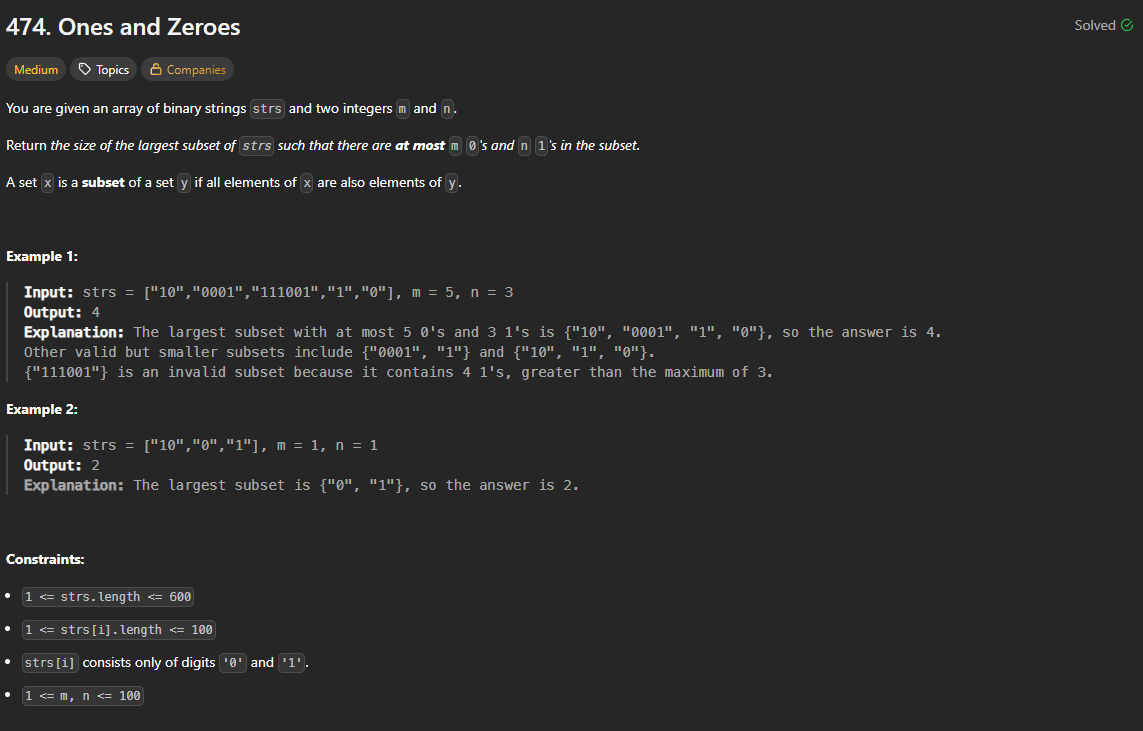

# Recursion

class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        
        def helper(i=0, p=m, q=n):
            if i == len(strs) or p < 0 or q < 0:
                return 0 if p >= 0 and q >= 0 else float('-inf')

            zero_count = strs[i].count('0')
            one_count = strs[i].count('1')

            # include
            inc = 1 + helper(i + 1, p - zero_count, q - one_count)

            # not include
            exc = helper(i + 1, p, q)

            return max(inc, exc)

        return helper()

# Dynamic Programming

In [ ]:
from typing import List

class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        length = len(strs)

        # Initialize 3D DP table: (length+1) x (m+1) x (n+1)
        # dp[i][j][k] = max number of strings using first i strings with j zeros and k ones
        dp = [[[0 for _ in range(n + 1)] for _ in range(m + 1)] for _ in range(length + 1)]

        # Fill the DP table
        for i in range(length):
            zeros = strs[i].count('0')
            ones = strs[i].count('1')

            for j in range(m + 1):         # iterate over available 0s
                for k in range(n + 1):     # iterate over available 1s
                    if i == 0:
                        # Base case: first string only
                        if j >= zeros and k >= ones:
                            dp[i][j][k] = 1
                        else:
                            dp[i][j][k] = 0

                    else:
                    # If current string can be included (enough 0s and 1s)
                        if j >= zeros and k >= ones:
                            # Take max of:
                            # 1. Not including current string
                            # 2. Including it (so add 1 and reduce 0s and 1s)
                            dp[i][j][k] = max(
                                dp[i - 1][j][k],
                                dp[i - 1][j - zeros][k - ones] + 1
                            )
                        else:
                            # Cannot include current string
                            dp[i][j][k] = dp[i - 1][j][k]

        # Final answer is using all strings and full quota of 0s and 1s
        return dp[length - 1][m][n]
